In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest  #use of decision tree

In [7]:
import numpy as np
import pandas as pd
from google.colab import files

overs = [0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11]
scores = [0, 15, 10, 3, 4, 4567, 17, 10, 12, 20, 100, 7, 8, 9]

df = pd.DataFrame({
    'Overs': overs,
    'Scores': scores
})

df['Row_Number'] = np.arange(1, len(df) + 1)

np.random.seed(42)  # For reproducibility
overs_random = np.random.randint(1, 20, size=150)
scores_random = np.random.randint(1, 80, size=150)

random_data = pd.DataFrame({
    'Row_Number': np.arange(1, 151),
    'Overs': overs_random,
    'Scores': scores_random
})

random_file_path = 'overs_scores_random.csv'
random_data.to_csv(random_file_path, index=False)

files.download(random_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#assumotion - 1 over can have 36 runs or >36 runs

In [8]:
df=pd.read_csv('overs_scores_random.csv')
df.head()

,Row_Number,Overs,Scores
0,1,7,44
1,2,15,24
2,3,11,79
3,4,8,59
4,5,7,32


In [10]:
model=IsolationForest(n_estimators=100,max_samples='auto', contamination=float(0.2), max_features=1.0)


In [13]:
model.fit(df[['Scores']])

IsolationForest(contamination=0.2)

In [14]:
#prediction

df['anomailes_scores']=model.decision_function(df[['Scores']])
df['anomaly']=model.predict(df[['Scores']])
df.head (20)

,Row_Number,Overs,Scores,anomailes_scores,anomaly
0,1,7,44,0.030029,1
1,2,15,24,0.094963,1
2,3,11,79,-0.199180,-1
3,4,8,59,0.077759,1
4,5,7,32,0.106678,1
5,6,19,52,0.055164,1
6,7,11,62,0.004775,1
7,8,11,58,0.046451,1
8,9,4,52,0.055164,1
9,10,8,12,-0.002030,-1


In [15]:
# Convert anomaly values for better understanding
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 0: normal, 1: anomaly


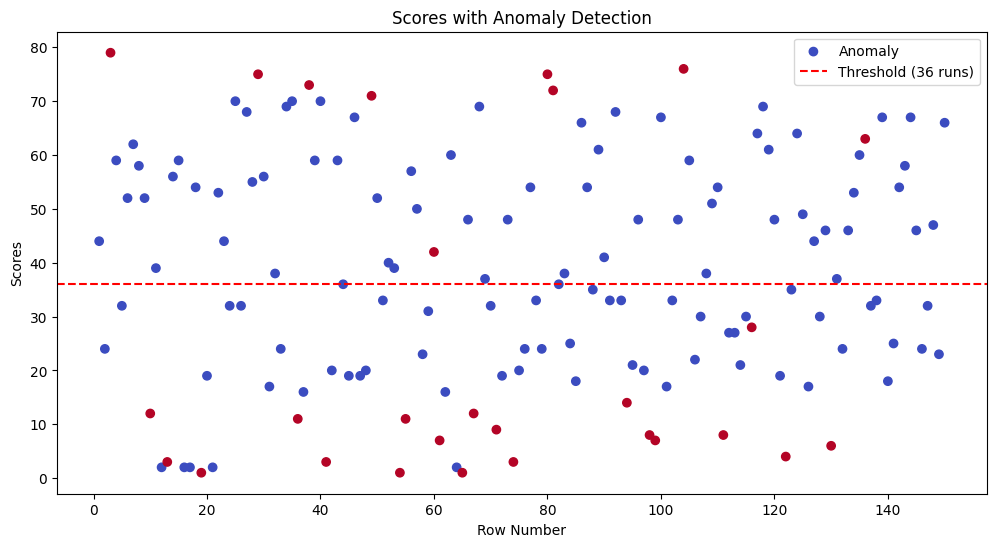

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['Row_Number'], df['Scores'], c=df['anomaly'], cmap='coolwarm', label='Anomaly')
plt.title('Scores with Anomaly Detection')
plt.xlabel('Row Number')
plt.ylabel('Scores')
plt.axhline(y=36, color='r', linestyle='--', label='Threshold (36 runs)')
plt.legend()
plt.show()

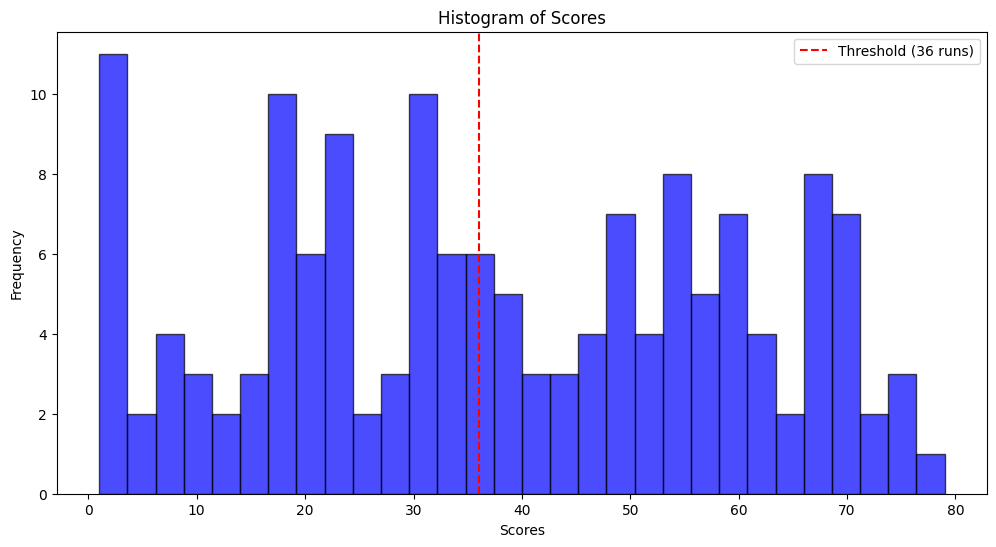

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(df['Scores'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.axvline(x=36, color='red', linestyle='--', label='Threshold (36 runs)')
plt.legend()
plt.show()

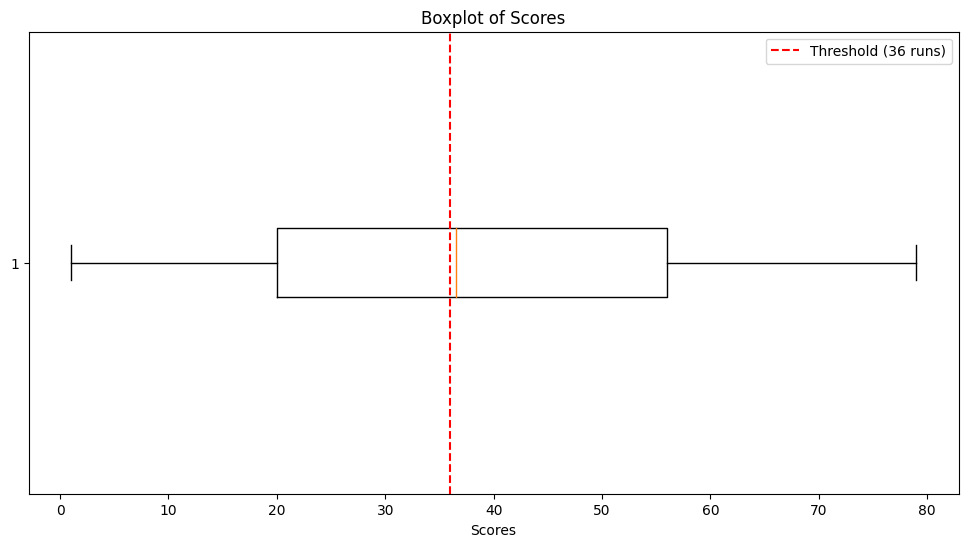

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Scores'], vert=False)
plt.title('Boxplot of Scores')
plt.xlabel('Scores')
plt.axvline(x=36, color='red', linestyle='--', label='Threshold (36 runs)')
plt.legend()
plt.show()

In [21]:
print("Descriptive Statistics:")
print(df['Scores'].describe())

Descriptive Statistics:
count    150.000000
mean      37.973333
std       21.507591
min        1.000000
25%       20.000000
50%       36.500000
75%       56.000000
max       79.000000
Name: Scores, dtype: float64


In [18]:
num_anomalies = df['anomaly'].sum()
print(f'Total anomalies detected: {num_anomalies}')
print(df[df['anomaly'] == 1])  # Display anomaly records

Total anomalies detected: 28
     Row_Number  Overs  Scores  anomailes_scores  anomaly
2             3     11      79         -0.199180        1
9            10      8      12         -0.002030        1
12           13     12       3         -0.026599        1
18           19     17       1         -0.086036        1
28           29      7      75         -0.046702        1
35           36      9      11         -0.003183        1
37           38     15      73         -0.055160        1
40           41      8       3         -0.026599        1
48           49      4      71         -0.009691        1
53           54     18       1         -0.086036        1
54           55     12      11         -0.003183        1
59           60     16      42         -0.005004        1
60           61     15       7         -0.022009        1
64           65     16       1         -0.086036        1
66           67     18      12         -0.002030        1
70           71     15       9         -0.0